# Report

## Data sources

**Government response**:
* [CORONAVIRUS GOVERNMENT RESPONSE TRACKER](https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker#data)

**Covid-19 deaths**:
* [COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)
* [England & Wales](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/bulletins/deathsregisteredweeklyinenglandandwalesprovisional/weekending8january2021)

### Information about the data

#### CORONAVIRUS GOVERNMENT RESPONSE TRACKER

The dataset provides `StringencyIndex` value for every country by date, which combines categorical variables `C1-C8` using the following formula:

$$
\text{index} = \frac{1}{k} \sum_{j=1}^k I_j \\
$$

Each sub-index score (_I_) for any given indicator (_j_) on any given day (_t_), is calculated by the function described in equation 2 based on the following parameters:

- the maximum value of the indicator (_N<sub>j</sub>_)
- whether that indicator has a flag (_F<sub>j</sub>_=1 if the indicator has a flag variable, or 0 if the indicator does not have a flag variable)
- the recorded policy value on the ordinal scale (_v<sub>j,t</sub>_)
- the recorded binary flag for that indicator (_f<sub>j,t</sub>_)

$$
I_{j,t} = 100 \frac{v_{j,t} - 0.5(F_j - f_{j,t})}{N_j}
$$

**Indicators C1-C8**

### Containment and closure policies

| ID | Name | Description | Measurement | Coding |
| --- | --- | --- | --- | --- |
| C1 | `C1_School closing` | Record closings of schools and universities | Ordinal scale | 0 - no measures <br/>1 - recommend closing or all schools open with alterations resulting in significant differences compared to non-Covid-19 operations <br/>2 - require closing (only some levels or categories, eg just high school, or just public schools) <br/>3 - require closing all levels <br/>Blank - no data |
| | `C1_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C2 | `C2_Workplace closing` | Record closings of workplaces | Ordinal scale | 0 - no measures <br/>1 - recommend closing (or recommend work from home) <br/>2 - require closing (or work from home) for some sectors or categories of workers <br/>3 - require closing (or work from home) for all-but-essential workplaces (eg grocery stores, doctors) <br/>Blank - no data |
| | `C2_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C3 | `C3_Cancel public events` | Record cancelling public events | Ordinal scale | 0 - no measures <br/>1 - recommend cancelling <br/>2 - require cancelling <br/>Blank - no data |
| | `C3_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C4 | `C4_Restrictions on gatherings` | Record limits on gatherings | Ordinal scale | 0 - no restrictions <br/>1 - restrictions on very large gatherings (the limit is above 1000 people) <br/>2 - restrictions on gatherings between 101-1000 people <br/>3 - restrictions on gatherings between 11-100 people <br/>4 - restrictions on gatherings of 10 people or less <br/>Blank - no data |
| | `C4_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C5 | `C5_Close public transport` | Record closing of public transport | Ordinal scale | 0 - no measures <br/>1 - recommend closing (or significantly reduce volume/route/means of transport available) <br/>2 - require closing (or prohibit most citizens from using it) <br/>Blank - no data |
| | `C5_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C6 | `C6_Stay at home requirements` | Record orders to "shelter-in-place" and otherwise confine to the home | Ordinal scale | 0 - no measures <br/>1 - recommend not leaving house <br/>2 - require not leaving house with exceptions for daily exercise, grocery shopping, and 'essential' trips <br/>3 - require not leaving house with minimal exceptions (eg allowed to leave once a week, or only one person can leave at a time, etc) <br/>Blank - no data |
| | `C6_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C7 | `C7_Restrictions on internal movement` | Record restrictions on internal movement between cities/regions | Ordinal scale | 0 - no measures <br/>1 - recommend not to travel between regions/cities <br/>2 - internal movement restrictions in place <br/>Blank - no data |
| | `C7_Flag` | | Binary flag for geographic scope | 0 - targeted <br/>1- general <br/>Blank - no data |
| C8 | `C8_International travel controls` | Record restrictions on international travel <br/><br/>Note: this records policy for foreign travellers, not citizens | Ordinal scale | 0 - no restrictions <br/>1 - screening arrivals <br/>2 - quarantine arrivals from some or all regions <br/>3 - ban arrivals from some regions <br/>4 - ban on all regions or total border closure <br/>Blank - no data |

Summary:

| Indicator | Max. value (_N<sub>j</sub>_) | Flag? (_F<sub>j</sub>_) |
| --- | --- | --- |
| C1 | 3 (0, 1, 2, 3) | yes=1 |
| C2 | 3 (0, 1, 2, 3) | yes=1 |
| C3 | 2 (0, 1, 2) | yes=1 |
| C4 | 4 (0, 1, 2, 3, 4) | yes=1 |
| C5 | 2 (0, 1, 2) | yes=1 |
| C6 | 3 (0, 1, 2, 3) | yes=1 |
| C7 | 2 (0, 1, 2) | yes=1 |
| C8 | 4 (0, 1, 2, 3, 4) | no=0 |

More information on other [indicators](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md) and how indices are [computed](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md).

## Correlation between stringent policies and saved lives

Assumptions:
- Stringency of policies of every country is quantized as an average StringencyIndex.
- Efficiency of every country is measured as deaths per million (DPM).

In [84]:
source('funcs.R')

In [2]:
# get every country average StringencyIndex and total deaths per million.
data = load_data()

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'CountryName' (override with `.groups` argument)



**Worldwide**

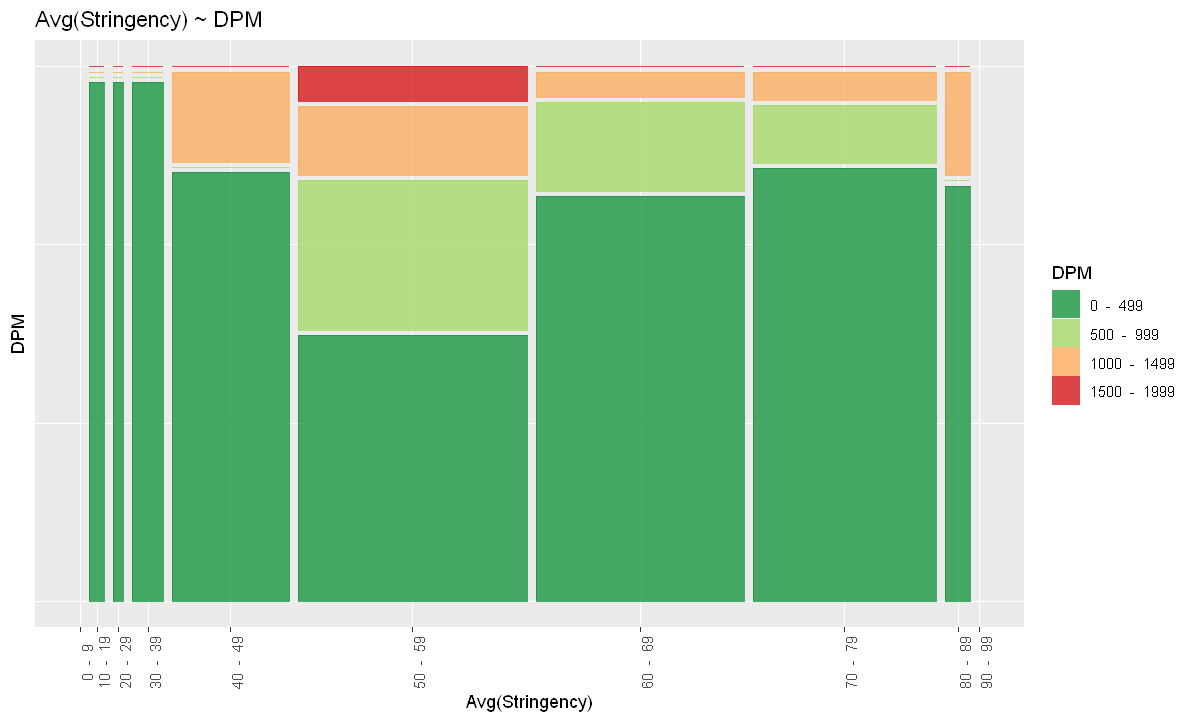

In [3]:
options(repr.plot.width = 10, repr.plot.height=6)
stringency_vs_dpm_plot(data$avg_si_vs_dpm) + labs(title='Avg(Stringency) ~ DPM')

Having average `StringencyIndex` in a range of 50-59 is deadliest. Number of deaths tends to decrease with either having less restrictions or more. I can think of the following explanations for these results:

1. Being in the middle means that population is not allowed to develop herd immunity and at the same time restrictions are not strict enough to prevent the virus from spreading.
2. Poor countries might be "younger", thus the virus is less deadly even without any restrictions.
3. Death counts are not reported accurately by poor or non-transparent countries.

**NOTE**. The above graph excludes the following countries: Brazil, United States, Canada, United Kingdom. This is due to their stringency measures being split by region and I currently don't have deaths data by region for all of those countries.

We can have a look at countries with low average `StringencyIndex` just to see what makes the non-restrictive sample:

In [18]:
data$avg_si_vs_dpm %>% arrange(mean_si) %>% slice_head(n=15)

CountryCode,continent,CountryName,mean_si,dpm,mean_si_group,dpm_group
<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>
BDI,Africa,Burundi,13.89500,0.168,10 - 19,0 - 499
NIC,North America,Nicaragua,14.73781,25.360,10 - 19,0 - 499
BLR,Europe,Belarus,17.28557,169.430,10 - 19,0 - 499
TWN,Asia,Taiwan,24.46106,0.294,20 - 29,0 - 499
TZA,Africa,Tanzania,27.57467,0.352,20 - 29,0 - 499
NER,Africa,Niger,30.08572,6.031,30 - 39,0 - 499
MUS,Africa,Mauritius,35.31603,7.863,30 - 39,0 - 499
YEM,Asia,Yemen,35.94789,20.519,30 - 39,0 - 499
JPN,Asia,Japan,36.09442,37.003,30 - 39,0 - 499


Whilst there are a lot of countries that might check points 2 and 3 (African countries, Belarus), there some interesting cases:
* Taiwan with mean SI in 20 - 29 range and 0.294 DPM.
* Japan with mean SI in 30 - 39 range and 37 DPM.
* New Zealand with mean SI in 30 - 39 and 39 DPM.
* Estonia with mean SI in 30 - 39 and 259 DPM.
* Finland with mean SI in 40 - 49 and 112 DPM.

**By continent**

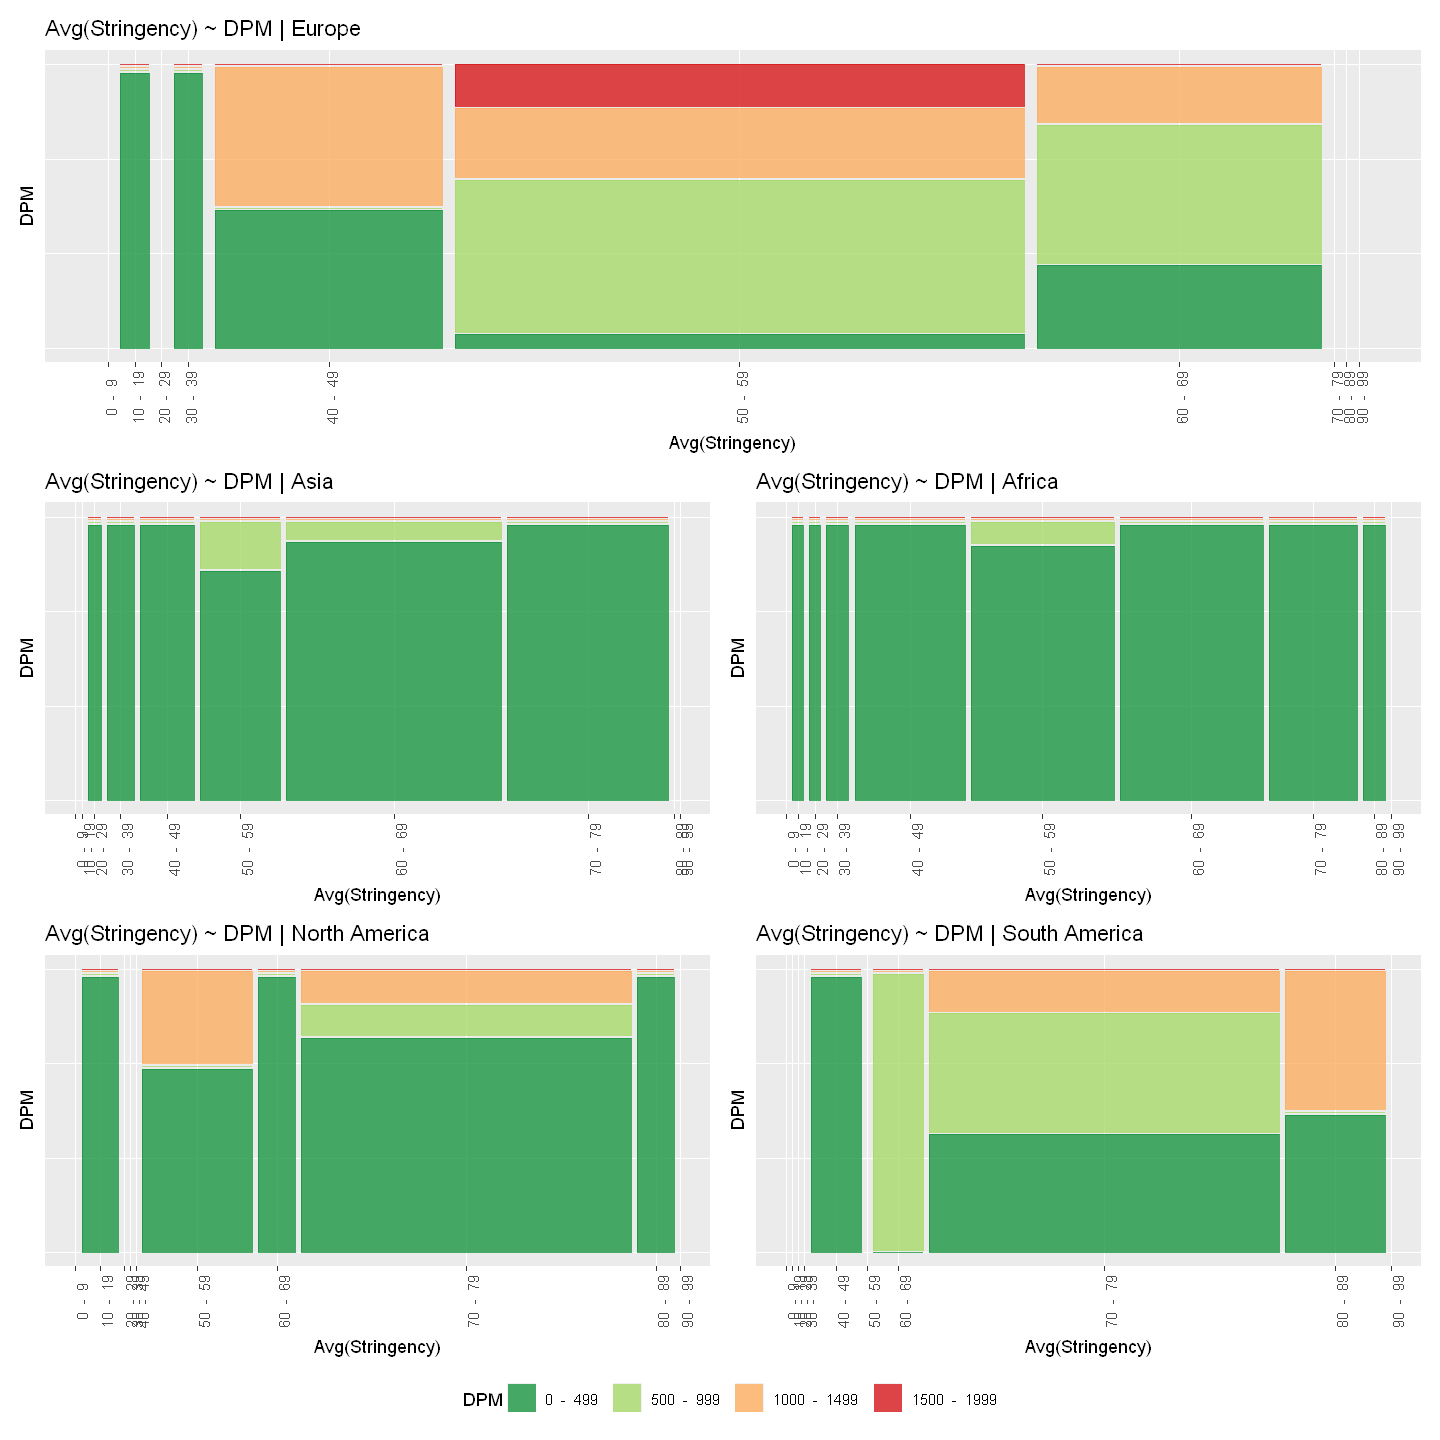

In [13]:
p1 = stringency_vs_dpm_plot(data$avg_si_vs_dpm %>% 
                              filter(continent=='Europe')) + labs(title='Avg(Stringency) ~ DPM | Europe')
p2 = stringency_vs_dpm_plot(data$avg_si_vs_dpm %>% 
                              filter(continent=='Asia')) + labs(title='Avg(Stringency) ~ DPM | Asia')
p3 = stringency_vs_dpm_plot(data$avg_si_vs_dpm %>% 
                              filter(continent=='Africa')) + labs(title='Avg(Stringency) ~ DPM | Africa')
p4 = stringency_vs_dpm_plot(data$avg_si_vs_dpm %>% 
                              filter(continent=='North America')) + labs(title='Avg(Stringency) ~ DPM | North America')
p5 = stringency_vs_dpm_plot(data$avg_si_vs_dpm %>% 
                              filter(continent=='South America')) + labs(title='Avg(Stringency) ~ DPM | South America')

options(repr.plot.width = 12, repr.plot.height=12)
combined <- p1 / (p2+p3) / (p4 + p5) & theme(legend.position = "bottom")
combined + plot_layout(guides = "collect")

Same pattern occurs by continent as does for the whole world -- average SI in 50-59 range is deadliest.

**NOTE**. The above graph excludes the following countries: Brazil, United States, Canada, United Kingdom. This is due to their stringency measures being split by region and I currently don't have deaths data by region for all of those countries.

**TODO**. Add graphs for every policy effectivness. Would this be usefull though? How does the rest of actions change anything? I suppose if the DPM is not decreasing with average stringency this should indicate that it is a pointless restriction.

## Policies used in Europe

### Deadliest countries

In [29]:
data$avg_si_vs_dpm %>% filter(continent == 'Europe') %>% arrange(desc(dpm)) %>% slice_head(n=10)

CountryCode,continent,CountryName,mean_si,dpm,mean_si_group,dpm_group
<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>
SMR,Europe,San Marino,50.30916,1915.257,50 - 59,1500 - 1999
BEL,Europe,Belgium,56.50017,1773.484,50 - 59,1500 - 1999
SVN,Europe,Slovenia,52.94906,1554.163,50 - 59,1500 - 1999
ITA,Europe,Italy,64.49633,1375.364,60 - 69,1000 - 1499
BIH,Europe,Bosnia and Herzegovina,56.61687,1374.354,50 - 59,1000 - 1499
CZE,Europe,Czech Republic,52.58055,1367.637,50 - 59,1000 - 1499
BGR,Europe,Bulgaria,48.74680,1239.702,40 - 49,1000 - 1499
HUN,Europe,Hungary,59.10458,1192.503,50 - 59,1000 - 1499
AND,Europe,Andorra,46.46368,1190.707,40 - 49,1000 - 1499


## Least deadly countries

In [41]:
data$avg_si_vs_dpm %>% filter(continent == 'Europe') %>% arrange(dpm) %>% slice_head(n=10)

CountryCode,continent,CountryName,mean_si,dpm,mean_si_group,dpm_group
<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>
ISL,Europe,Iceland,44.97770,84.982,40 - 49,0 - 499
NOR,Europe,Norway,48.31479,96.841,40 - 49,0 - 499
FIN,Europe,Finland,41.10017,112.079,40 - 49,0 - 499
BLR,Europe,Belarus,17.28557,169.430,10 - 19,0 - 499
CYP,Europe,Cyprus,65.87354,200.936,60 - 69,0 - 499
MCO,Europe,Monaco,64.15584,229.334,60 - 69,0 - 499
EST,Europe,Estonia,39.36933,259.321,30 - 39,0 - 499
DNK,Europe,Denmark,49.39315,317.323,40 - 49,0 - 499
ALB,Europe,Albania,67.00959,447.217,60 - 69,0 - 499


Observations:
* Iceland, Norway, Finland, Belarus, Estonia, Denmark and Russia are all nothern Europe countries.
* Not sure if Russia's numbers can be trusted.
* Cyprus, Monaco and Albania are southern Europe countries.
* Northern European countries in the list were the least restrictive Avg(StringencyIndex) < 50.
* Southern European countries in the list were the most restrictive Avg(StringencyIndex) >= 60.